<h2 style='color:green' align='center' ><font size="5.5">Classification of Anomalies  in Gastrointestinal Tract through Endoscopic Imagery  Using Convolutional Neural Network (CNN)</font></h2>


<h2 style='color:gray' ><font size="3">Loading the image set and splits using 70% of the data for training and the remaining 30% for testing</font></h2>


In [102]:
import os
import splitfolders 

input_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2')
output_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2_splitted')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.7, .3), group_prefix=None)




Copying files: 0 files [00:00, ? files/s]


Copying files: 2 files [00:00, 19.86 files/s]


Copying files: 41 files [00:00, 27.75 files/s]


Copying files: 83 files [00:00, 38.54 files/s]


Copying files: 125 files [00:00, 52.94 files/s]


Copying files: 158 files [00:00, 70.69 files/s]


Copying files: 187 files [00:00, 89.43 files/s]


Copying files: 215 files [00:01, 47.55 files/s]


Copying files: 235 files [00:02, 31.77 files/s]


Copying files: 250 files [00:03, 34.97 files/s]


Copying files: 262 files [00:04, 20.55 files/s]


Copying files: 271 files [00:04, 25.38 files/s]


Copying files: 279 files [00:04, 29.40 files/s]


Copying files: 286 files [00:06, 11.09 files/s]


Copying files: 291 files [00:08,  5.83 files/s]


Copying files: 295 files [00:09,  5.15 files/s]


Copying files: 298 files [00:10,  4.27 files/s]


Copying files: 304 files [00:10,  5.90 files/s]


Copying files: 309 files [00:10,  7.97 files/s]


Copying files: 314 files [00:10, 10.45 files/s]


Copying

Copying files: 931 files [00:41,  7.88 files/s]


Copying files: 935 files [00:42,  9.43 files/s]


Copying files: 937 files [00:42, 11.08 files/s]


Copying files: 940 files [00:42, 12.90 files/s]


Copying files: 942 files [00:42, 13.90 files/s]


Copying files: 944 files [00:42, 14.48 files/s]


Copying files: 948 files [00:42, 16.71 files/s]


Copying files: 951 files [00:43,  7.65 files/s]


Copying files: 953 files [00:44,  6.29 files/s]


Copying files: 955 files [00:44,  4.92 files/s]


Copying files: 956 files [00:44,  5.07 files/s]


Copying files: 958 files [00:44,  6.33 files/s]


Copying files: 960 files [00:45,  7.05 files/s]


Copying files: 962 files [00:45,  7.40 files/s]


Copying files: 963 files [00:45,  5.67 files/s]


Copying files: 967 files [00:45,  7.62 files/s]


Copying files: 972 files [00:45, 10.17 files/s]


Copying files: 976 files [00:46, 12.81 files/s]


Copying files: 984 files [00:46, 16.99 files/s]


Copying files: 991 files [00:46, 21.85 files/s]




Copying files: 1625 files [01:16, 32.27 files/s]


Copying files: 1630 files [01:17, 11.42 files/s]


Copying files: 1633 files [01:18,  7.00 files/s]


Copying files: 1636 files [01:19,  4.31 files/s]


Copying files: 1638 files [01:20,  3.26 files/s]


Copying files: 1640 files [01:21,  3.73 files/s]


Copying files: 1646 files [01:21,  5.19 files/s]


Copying files: 1651 files [01:21,  7.06 files/s]


Copying files: 1657 files [01:21,  9.47 files/s]


Copying files: 1664 files [01:21, 12.64 files/s]


Copying files: 1670 files [01:21, 16.55 files/s]


Copying files: 1677 files [01:21, 21.06 files/s]


Copying files: 1683 files [01:22, 16.09 files/s]


Copying files: 1687 files [01:22, 19.27 files/s]


Copying files: 1691 files [01:23, 13.16 files/s]


Copying files: 1698 files [01:23, 17.27 files/s]


Copying files: 1702 files [01:23, 13.64 files/s]


Copying files: 1706 files [01:24, 10.79 files/s]


Copying files: 1713 files [01:24, 14.33 files/s]


Copying files: 1717 files [01:2

Copying files: 2232 files [01:57, 10.50 files/s]


Copying files: 2235 files [01:57, 12.37 files/s]


Copying files: 2240 files [01:58, 12.50 files/s]


Copying files: 2242 files [01:58,  7.23 files/s]


Copying files: 2249 files [01:58,  9.82 files/s]


Copying files: 2256 files [01:58, 13.12 files/s]


Copying files: 2261 files [01:58, 16.70 files/s]


Copying files: 2267 files [01:59, 20.97 files/s]


Copying files: 2272 files [01:59, 11.02 files/s]


Copying files: 2277 files [02:00, 13.00 files/s]


Copying files: 2280 files [02:00, 14.45 files/s]


Copying files: 2283 files [02:01,  7.27 files/s]


Copying files: 2285 files [02:01,  8.28 files/s]


Copying files: 2290 files [02:01, 10.95 files/s]


Copying files: 2295 files [02:01, 14.09 files/s]


Copying files: 2299 files [02:02,  7.69 files/s]


Copying files: 2302 files [02:02,  9.71 files/s]


Copying files: 2307 files [02:02, 12.78 files/s]


Copying files: 2313 files [02:03, 16.55 files/s]


Copying files: 2317 files [02:0

Copying files: 2851 files [02:40,  7.06 files/s]


Copying files: 2854 files [02:42,  4.33 files/s]


Copying files: 2856 files [02:42,  4.24 files/s]


Copying files: 2860 files [02:42,  5.79 files/s]


Copying files: 2865 files [02:42,  7.79 files/s]


Copying files: 2870 files [02:43, 10.19 files/s]


Copying files: 2875 files [02:43, 12.63 files/s]


Copying files: 2878 files [02:43, 15.11 files/s]


Copying files: 2883 files [02:43, 18.36 files/s]


Copying files: 2887 files [02:43, 21.68 files/s]


Copying files: 2891 files [02:44, 11.66 files/s]


Copying files: 2896 files [02:44, 14.97 files/s]


Copying files: 2900 files [02:44, 18.28 files/s]


Copying files: 2905 files [02:44, 22.17 files/s]


Copying files: 2909 files [02:44, 19.66 files/s]


Copying files: 2913 files [02:45, 22.58 files/s]


Copying files: 2917 files [02:47,  5.59 files/s]


Copying files: 2920 files [02:47,  4.95 files/s]


Copying files: 2926 files [02:47,  6.81 files/s]


Copying files: 2930 files [02:4

Copying files: 3519 files [03:23, 26.73 files/s]


Copying files: 3526 files [03:23, 32.42 files/s]


Copying files: 3532 files [03:24, 17.27 files/s]


Copying files: 3539 files [03:24, 22.01 files/s]


Copying files: 3546 files [03:24, 27.62 files/s]


Copying files: 3552 files [03:24, 32.70 files/s]


Copying files: 3558 files [03:24, 37.32 files/s]


Copying files: 3564 files [03:25, 40.59 files/s]


Copying files: 3570 files [03:25, 42.68 files/s]


Copying files: 3576 files [03:26, 13.15 files/s]


Copying files: 3580 files [03:28,  4.55 files/s]


Copying files: 3585 files [03:28,  6.26 files/s]


Copying files: 3591 files [03:28,  8.50 files/s]


Copying files: 3599 files [03:28, 11.58 files/s]


Copying files: 3604 files [03:29, 14.80 files/s]


Copying files: 3611 files [03:29, 19.10 files/s]


Copying files: 3617 files [03:29, 23.49 files/s]


Copying files: 3623 files [03:29, 28.02 files/s]


Copying files: 3629 files [03:29, 19.17 files/s]


Copying files: 3633 files [03:3

Copying files: 4160 files [04:00, 28.41 files/s]


Copying files: 4165 files [04:01, 32.03 files/s]


Copying files: 4169 files [04:02,  8.97 files/s]


Copying files: 4173 files [04:02, 11.64 files/s]


Copying files: 4178 files [04:03,  8.60 files/s]


Copying files: 4181 files [04:03,  8.53 files/s]


Copying files: 4185 files [04:03, 11.13 files/s]


Copying files: 4188 files [04:04, 10.14 files/s]


Copying files: 4190 files [04:04,  6.01 files/s]


Copying files: 4192 files [04:05,  6.15 files/s]


Copying files: 4196 files [04:05,  8.20 files/s]


Copying files: 4198 files [04:05,  4.90 files/s]


Copying files: 4200 files [04:06,  5.76 files/s]


Copying files: 4203 files [04:06,  6.81 files/s]


Copying files: 4209 files [04:06,  9.18 files/s]


Copying files: 4214 files [04:06, 12.11 files/s]


Copying files: 4218 files [04:06, 15.16 files/s]


Copying files: 4223 files [04:06, 17.90 files/s]


Copying files: 4228 files [04:07, 21.63 files/s]


Copying files: 4233 files [04:0

Copying files: 4508 files [04:43, 15.78 files/s]


Copying files: 4512 files [04:43, 19.21 files/s]


Copying files: 4516 files [04:43, 21.73 files/s]


Copying files: 4521 files [04:43, 25.50 files/s]


Copying files: 4525 files [04:43, 18.80 files/s]


Copying files: 4529 files [04:43, 21.44 files/s]


Copying files: 4533 files [04:44, 18.25 files/s]


Copying files: 4537 files [04:44, 19.58 files/s]


Copying files: 4542 files [04:44, 23.49 files/s]


Copying files: 4547 files [04:44, 27.35 files/s]


Copying files: 4551 files [04:44, 29.57 files/s]


Copying files: 4555 files [04:44, 30.56 files/s]


Copying files: 4559 files [04:45, 18.23 files/s]


Copying files: 4562 files [04:45, 19.14 files/s]


Copying files: 4566 files [04:45, 22.13 files/s]


Copying files: 4570 files [04:45, 22.67 files/s]


Copying files: 4573 files [04:46, 13.95 files/s]


Copying files: 4577 files [04:46, 17.26 files/s]


Copying files: 4581 files [04:46, 11.67 files/s]


Copying files: 4584 files [04:4

Copying files: 5010 files [05:36,  3.23 files/s]


Copying files: 5012 files [05:36,  4.31 files/s]


Copying files: 5015 files [05:36,  5.71 files/s]


Copying files: 5018 files [05:36,  7.44 files/s]


Copying files: 5021 files [05:36,  8.31 files/s]


Copying files: 5023 files [05:36,  9.75 files/s]


Copying files: 5025 files [05:37,  7.97 files/s]


Copying files: 5027 files [05:37,  9.01 files/s]


Copying files: 5029 files [05:37, 10.08 files/s]


Copying files: 5032 files [05:37, 12.00 files/s]


Copying files: 5036 files [05:37, 14.66 files/s]


Copying files: 5039 files [05:37, 14.52 files/s]


Copying files: 5042 files [05:37, 16.78 files/s]


Copying files: 5045 files [05:38, 19.31 files/s]


Copying files: 5048 files [05:38, 16.31 files/s]


Copying files: 5051 files [05:38, 17.90 files/s]


Copying files: 5054 files [05:38, 15.54 files/s]


Copying files: 5058 files [05:38, 18.56 files/s]


Copying files: 5062 files [05:38, 22.09 files/s]


Copying files: 5066 files [05:3

Copying files: 5495 files [06:14, 25.82 files/s]


Copying files: 5498 files [06:15, 24.89 files/s]


Copying files: 5501 files [06:15, 25.13 files/s]


Copying files: 5505 files [06:15, 27.04 files/s]


Copying files: 5508 files [06:15, 16.26 files/s]


Copying files: 5511 files [06:16,  9.37 files/s]


Copying files: 5515 files [06:16, 12.13 files/s]


Copying files: 5520 files [06:16, 15.47 files/s]


Copying files: 5525 files [06:16, 19.42 files/s]


Copying files: 5529 files [06:16, 22.59 files/s]


Copying files: 5534 files [06:17, 13.62 files/s]


Copying files: 5537 files [06:18,  5.40 files/s]


Copying files: 5539 files [06:19,  4.41 files/s]


Copying files: 5542 files [06:19,  5.02 files/s]


Copying files: 5544 files [06:20,  4.54 files/s]


Copying files: 5549 files [06:20,  6.20 files/s]


Copying files: 5553 files [06:20,  8.30 files/s]


Copying files: 5557 files [06:20, 10.80 files/s]


Copying files: 5560 files [06:20, 12.94 files/s]


Copying files: 5563 files [06:2

Copying files: 5996 files [06:55, 20.80 files/s]


Copying files: 6000 files [06:55, 24.26 files/s]


Copying files: 6004 files [06:57,  5.34 files/s]


Copying files: 6007 files [06:57,  7.08 files/s]


Copying files: 6010 files [06:59,  4.56 files/s]


Copying files: 6013 files [07:00,  3.36 files/s]


Copying files: 6015 files [07:00,  3.58 files/s]


Copying files: 6017 files [07:01,  3.27 files/s]


Copying files: 6021 files [07:01,  4.48 files/s]


Copying files: 6023 files [07:03,  2.40 files/s]


Copying files: 6027 files [07:03,  3.33 files/s]


Copying files: 6030 files [07:03,  4.54 files/s]


Copying files: 6033 files [07:03,  6.01 files/s]


Copying files: 6036 files [07:04,  7.72 files/s]


Copying files: 6040 files [07:04, 10.10 files/s]


Copying files: 6043 files [07:04, 10.24 files/s]


Copying files: 6047 files [07:04, 13.09 files/s]


Copying files: 6050 files [07:04, 14.49 files/s]


Copying files: 6054 files [07:04, 17.68 files/s]


Copying files: 6057 files [07:0

Copying files: 6558 files [07:35, 13.10 files/s]


Copying files: 6562 files [07:35, 16.30 files/s]


Copying files: 6567 files [07:35, 20.04 files/s]


Copying files: 6571 files [07:35, 22.14 files/s]


Copying files: 6575 files [07:35, 25.14 files/s]


Copying files: 6579 files [07:35, 26.62 files/s]


Copying files: 6583 files [07:35, 22.75 files/s]


Copying files: 6586 files [07:36, 23.29 files/s]


Copying files: 6589 files [07:36, 24.92 files/s]


Copying files: 6593 files [07:36, 27.31 files/s]


Copying files: 6596 files [07:36, 25.64 files/s]


Copying files: 6599 files [07:36, 16.58 files/s]


Copying files: 6602 files [07:36, 18.46 files/s]


Copying files: 6606 files [07:37, 21.53 files/s]


Copying files: 6611 files [07:37, 25.27 files/s]


Copying files: 6615 files [07:37, 25.40 files/s]


Copying files: 6619 files [07:37, 21.10 files/s]


Copying files: 6622 files [07:37, 22.81 files/s]


Copying files: 6625 files [07:37, 18.89 files/s]


Copying files: 6628 files [07:3

Copying files: 7031 files [08:22,  9.39 files/s]


Copying files: 7035 files [08:22, 11.83 files/s]


Copying files: 7039 files [08:22, 13.78 files/s]


Copying files: 7042 files [08:23, 15.84 files/s]


Copying files: 7045 files [08:23, 14.89 files/s]


Copying files: 7047 files [08:23, 12.11 files/s]


Copying files: 7049 files [08:23, 13.09 files/s]


Copying files: 7051 files [08:23, 13.41 files/s]


Copying files: 7053 files [08:24,  8.93 files/s]


Copying files: 7055 files [08:24,  9.55 files/s]


Copying files: 7058 files [08:24, 11.44 files/s]


Copying files: 7064 files [08:24, 14.76 files/s]


Copying files: 7068 files [08:24, 17.64 files/s]


Copying files: 7071 files [08:25, 12.30 files/s]


Copying files: 7074 files [08:26,  7.14 files/s]


Copying files: 7076 files [08:26,  8.23 files/s]


Copying files: 7078 files [08:26,  8.22 files/s]


Copying files: 7080 files [08:26,  9.43 files/s]


Copying files: 7084 files [08:26, 12.23 files/s]


Copying files: 7087 files [08:2

Copying files: 7604 files [08:52, 14.72 files/s]


Copying files: 7607 files [08:53, 10.53 files/s]


Copying files: 7612 files [08:53, 13.72 files/s]


Copying files: 7617 files [08:53, 17.49 files/s]


Copying files: 7621 files [08:54,  9.97 files/s]


Copying files: 7624 files [08:55,  7.28 files/s]


Copying files: 7626 files [08:55,  7.63 files/s]


Copying files: 7630 files [08:55, 10.06 files/s]


Copying files: 7636 files [08:55, 13.31 files/s]


Copying files: 7641 files [08:55, 16.90 files/s]


Copying files: 7645 files [08:55, 20.30 files/s]


Copying files: 7650 files [08:55, 24.35 files/s]


Copying files: 7655 files [08:55, 26.55 files/s]


Copying files: 7660 files [08:56, 30.19 files/s]


Copying files: 7664 files [08:56, 28.50 files/s]


Copying files: 7670 files [08:56, 32.74 files/s]


Copying files: 7674 files [08:57,  8.87 files/s]


Copying files: 7678 files [08:57, 11.51 files/s]


Copying files: 7682 files [08:58, 10.58 files/s]


Copying files: 7687 files [08:5

In [103]:
train_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2_splitted\train')
test_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2_splitted\val')

<h2 style='color:gray' ><font size="3">ImageDataGenerator class which is used to perform image augmentation and flow_from_directory to read the images from a big numpy array and folders containing images.</font></h2>


In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (75,75),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(75,75),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [105]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 7592 images belonging to 8 classes.
Found 4192 images belonging to 8 classes.


In [106]:
classes=['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']

<h2 style='color:gray' ><font size="3">Preparing traing and testing data sets as X_train,y_train,X_test ,y_test</font></h2>

In [107]:
import numpy as np

In [108]:
X_train=[]
for j in range(len(train_generator)):    
    for m in train_generator[j][0]: 
        X_train.append(m)
        

In [109]:
y_train=[]
for i in range(len(train_generator)):
    for k in train_generator[i][1]:  
            y_train.append(np.argmax(k))           


In [110]:
X_test=[]        
for j in range(len(test_generator)):    
    for m in test_generator[j][0]: 
        X_test.append(m)

In [111]:
y_test=[]
for i in range(len(test_generator)):
    for k in test_generator[i][1]:  
            y_test.append(np.argmax(k))
           

<h2 style='color:gray' ><font size="3">Converting the feature lists into a NumPy array.</font></h2>

In [112]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [113]:
X_train.shape

(7592, 75, 75, 3)

In [114]:
y_train.shape

(7592,)

<h2 style='color:gray' ><font size="3">Ploting sample images using matplotlib.pyplot</font></h2>

In [115]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

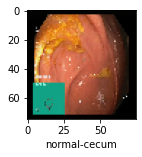

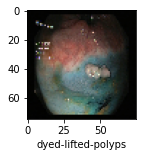

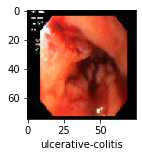

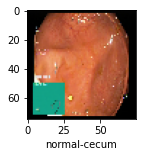

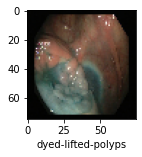

In [117]:
for i in range(5):    
    plot_sample(X_train, y_train, i)

<h2 style='color:gray' ><font size="3">Creating CNN usinga Sequential model by passing a list of layers to the Sequential constructor.</font></h2>

In [142]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [143]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

<h2 style='color:gray' ><font size="3">Show model summary</font></h2>

In [144]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)             

<h2 style='color:gray' ><font size="3"> Complieing the CNN model using Optimizer and loss function before training.</font></h2>

In [145]:
cnn.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h2 style='color:gray' ><font size="3">Fitting the dataset to train</font></h2>

In [146]:
history=cnn.fit(X_train, y_train, epochs=25)

Epoch 1/25
238/238 [==============================] - 58s 240ms/step - loss: 1.2558 - accuracy: 0.4863
Epoch 2/25
238/238 [==============================] - 62s 261ms/step - loss: 0.7017 - accuracy: 0.6840
Epoch 3/25
238/238 [==============================] - 60s 252ms/step - loss: 0.6165 - accuracy: 0.7232
Epoch 4/25
238/238 [==============================] - 63s 266ms/step - loss: 0.5658 - accuracy: 0.7501
Epoch 5/25
238/238 [==============================] - 60s 253ms/step - loss: 0.5338 - accuracy: 0.7598
Epoch 6/25
238/238 [==============================] - 67s 281ms/step - loss: 0.4907 - accuracy: 0.7767
Epoch 7/25
238/238 [==============================] - 70s 296ms/step - loss: 0.4952 - accuracy: 0.7798
Epoch 8/25
238/238 [==============================] - 64s 267ms/step - loss: 0.4543 - accuracy: 0.8067
Epoch 9/25
238/238 [==============================] - 63s 263ms/step - loss: 0.4108 - accuracy: 0.8212
Epoch 10/25
238/238 [==============================] - 59s 249ms/step - l

<h2 style='color:gray' ><font size="3">Finding  model accuracy </font></h2>

In [147]:
accuracy=cnn.evaluate(X_test,y_test)[1]
print("\nModel Accuracy =", (accuracy * 100.0),"%") 

131/131 [==============================] - 9s 67ms/step - loss: 0.1460 - accuracy: 0.9609

Model Accuracy = 96.08778357505798 %


In [152]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.760


<h2 style='color:gray' ><font size="3">Visualizeing loss history </font></h2>

In [133]:
(history.history).keys()

dict_keys(['loss', 'accuracy'])

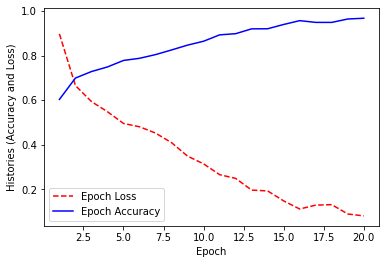

In [134]:
# Get accuracy and test loss histories
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['Epoch Loss', 'Epoch Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Histories (Accuracy and Loss)')
plt.show();

<h2 style='color:gray' ><font size="3">Checking model prediction</font></h2>

In [135]:
y_pred = cnn.predict(X_test)

In [136]:
y_classes = [np.argmax(element) for element in y_pred]

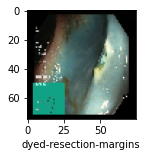

In [150]:
#Correct Anomalies 
plot_sample(X_test, y_test,4)

In [151]:
#Predict Anomalies by model
classes[y_classes[4]]

'dyed-resection-margins'

<h2 style='color:gray' ><font size="3">Computing confusion matrix to evaluate the accuracy of a classification.</font></h2>

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_classes)
cm

array([[510,  12,   0,   0,   0,   0,   1,   1],
       [ 22, 502,   0,   0,   0,   0,   0,   0],
       [  0,   0, 435,   0,   0,  89,   0,   0],
       [  0,   0,   0, 519,   0,   0,   4,   1],
       [  0,   0,   1,   0, 520,   3,   0,   0],
       [  0,   0,   8,   0,   1, 515,   0,   0],
       [  0,   0,   0,   6,   1,   0, 510,   7],
       [  0,   0,   0,   1,   0,   0,   7, 516]], dtype=int64)

<h2 style='color:gray' ><font size="3">Visualizing model accuracy using seaborn heatmap</font></h2>

([<matplotlib.axis.YTick at 0x233cba12448>,
 [Text(0, 0, 'dyed-lifted-polyps'),
  Text(0, 1, 'dyed-resection-margins'),
  Text(0, 2, 'esophagitis'),
  Text(0, 3, 'normal-cecum'),
  Text(0, 4, 'normal-pylorus'),
  Text(0, 5, 'normal-z-line'),
  Text(0, 6, 'polyps'),
  Text(0, 7, 'ulcerative-colitis')])

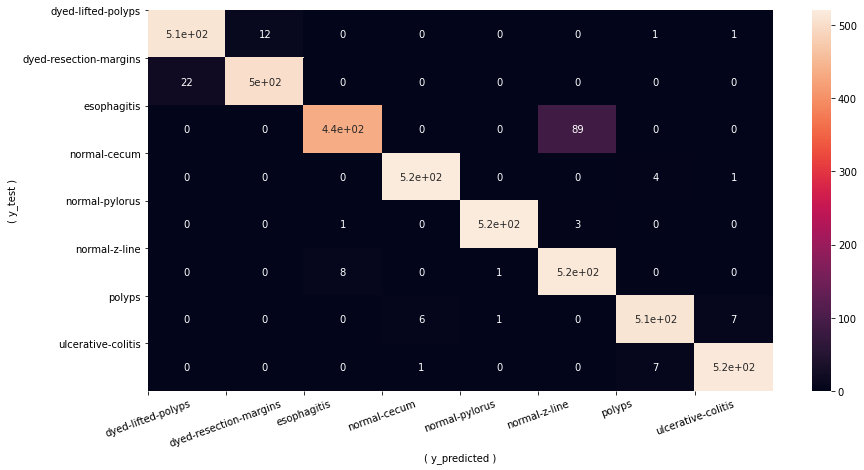

In [140]:
import seaborn as sn

plt.figure(figsize=(14,7))
sn.heatmap(cm,annot=True)

plt.ylabel('( y_test )')
plt.xlabel('( y_predicted )')
plt.xticks(range(len(classes)),classes, rotation=20)
plt.yticks(range(len(classes)),classes,rotation=0)
